### PRICE REGRESSION MODELLING

Librerías

In [10]:
import numpy as np
from sklearn.decomposition import PCA
from urllib.parse import urlencode
import pandas as pd
import plotly.express as px
import plotly.io as pio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
import math
from plotly.subplots import make_subplots


pio.renderers.default = 'vscode'
pio.templates.default = 'plotly'

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import label_binarize


import plotly.figure_factory as ff

import geopandas 
import json

from cv2 import mean
from itertools import count

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

from scipy.stats import uniform, randint

from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split

import xgboost as xgb

Importación de datos

In [3]:
listings_total_data = pd.read_parquet("../Data/total data/raw data parquet/listings.parquet")
pd.options.display.max_columns = None
listings_total_data.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2539,https://www.airbnb.com/rooms/2539,20220907064715,2022-09-07,city scrape,Clean & quiet apt home by the park,Renovated apt home in elevator building.<br />...,Close to Prospect Park and Historic Ditmas Park,https://a0.muscache.com/pictures/3949d073-a02e...,2787,https://www.airbnb.com/users/show/2787,John,2008-09-07,"New York, NY",Educated professional living in Brooklyn. I l...,within an hour,100%,90%,f,https://a0.muscache.com/im/pictures/user/86745...,https://a0.muscache.com/im/pictures/user/86745...,Gravesend,9.0,12.0,"['email', 'phone']",t,t,"Brooklyn , New York, United States",Kensington,Brooklyn,40.64529,-73.97238,Private room in rental unit,Private room,2,NaN,1 shared bath,1.0,1.0,"[""First aid kit"", ""Microwave"", ""Stove"", ""Coffe...",$299.00,30,730,30.0,30.0,730.0,730.0,30.0,730.0,NaN,t,21,51,81,356,2022-09-07,9,0,0,2015-12-04,2018-10-19,4.89,4.88,5.00,5.00,5.00,4.75,4.88,None,f,9,1,6,2,0.11
1,2595,https://www.airbnb.com/rooms/2595,20220907064715,2022-09-07,city scrape,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,https://www.airbnb.com/users/show/2845,Jennifer,2008-09-09,"New York, NY",A New Yorker since (Phone number hidden by Air...,within a day,75%,23%,f,https://a0.muscache.com/im/pictures/user/50fc5...,https://a0.muscache.com/im/pictures/user/50fc5...,Midtown,6.0,9.0,"['email', 'phone', 'work_email']",t,t,"New York, United States",Midtown,Manhattan,40.75356,-73.98559,Entire rental unit,Entire home/apt,1,NaN,1 bath,NaN,1.0,"[""Stove"", ""Coffee maker"", ""Long term stays all...",$175.00,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,NaN,t,0,0,5,280,2022-09-07,49,1,0,2009-11-21,2022-06-21,4.68,4.73,4.63,4.77,4.80,4.81,4.40,None,f,3,3,0,0,0.31
2,5121,https://www.airbnb.com/rooms/5121,20220907064715,2022-09-07,city scrape,BlissArtsSpace!,One room available for rent in a 2 bedroom apt...,None,https://a0.muscache.com/pictures/2090980c-b68e...,7356,https://www.airbnb.com/users/show/7356,Garon,2009-02-03,"New York, NY","I am an artist(painter, filmmaker) and curato...",within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/72a61...,https://a0.muscache.com/im/pictures/user/72a61...,Bedford-Stuyvesant,2.0,2.0,"['email', 'phone']",t,t,None,Bedford-Stuyvesant,Brooklyn,40.68535,-73.95512,Private room in rental unit,Private room,2,NaN,None,1.0,1.0,"[""Heating"", ""Kitchen"", ""Air conditioning"", ""Wi...",$60.00,30,730,30.0,30.0,730.0,730.0,30.0,730.0,NaN,t,5,30,60,335,2022-09-07,50,0,0,2009-05-28,2019-12-02,4.52,4.22,4.09,4.91,4.91,4.47,4.52,None,f,2,0,2,0,0.31
3,45910,https://ww

In [4]:
#selección de las columnas que nos interesan
columnList = ["id","last_scraped","host_name","host_since","host_response_time","host_id","host_response_rate","host_acceptance_rate",
              "host_is_superhost","host_neighbourhood","host_listings_count","host_total_listings_count","host_has_profile_pic",
              "host_identity_verified","neighbourhood_cleansed","neighbourhood_group_cleansed","latitude","longitude","property_type",
              "room_type","accommodates","bathrooms","bathrooms_text","bedrooms","beds","amenities","price","minimum_nights","maximum_nights",
              "minimum_minimum_nights","maximum_minimum_nights","minimum_maximum_nights","maximum_maximum_nights","minimum_nights_avg_ntm","maximum_nights_avg_ntm",
              "calendar_updated","has_availability","availability_30","availability_60","availability_90","availability_365","number_of_reviews","number_of_reviews_ltm",
              "number_of_reviews_l30d","first_review","last_review","review_scores_rating","review_scores_accuracy","review_scores_cleanliness","review_scores_checkin",
              "review_scores_communication","review_scores_location","review_scores_value","license","instant_bookable","calculated_host_listings_count","calculated_host_listings_count_entire_homes",
              "calculated_host_listings_count_private_rooms","calculated_host_listings_count_shared_rooms","reviews_per_month"]


listings_reduced_df = listings_total_data[[x for x in listings_total_data.columns if x in columnList]]
listings_reduced_df["price"] = listings_reduced_df["price"].str.replace(pat=",",repl="")
listings_reduced_df["price"] = listings_reduced_df["price"].str.replace(pat="$",repl="")
listings_reduced_df["price"]=listings_reduced_df["price"].astype(float)
listings_reduced_df.head()

c:\Users\belen\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\belen\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.

c:\Users\belen\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\

,id,last_scraped,host_id,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2539,2022-09-07,2787,John,2008-09-07,within an hour,100%,90%,f,Gravesend,9.0,12.0,t,t,Kensington,Brooklyn,40.64529,-73.97238,Private room in rental unit,Private room,2,NaN,1 shared bath,1.0,1.0,"[""First aid kit"", ""Microwave"", ""Stove"", ""Coffe...",299.0,30,730,30.0,30.0,730.0,730.0,30.0,730.0,NaN,t,21,51,81,356,9,0,0,2015-12-04,2018-10-19,4.89,4.88,5.00,5.00,5.00,4.75,4.88,None,f,9,1,6,2,0.11
1,2595,2022-09-07,2845,Jennifer,2008-09-09,within a day,75%,23%,f,Midtown,6.0,9.0,t,t,Midtown,Manhattan,40.75356,-73.98559,Entire rental unit,Entire home/apt,1,NaN,1 bath,NaN,1.0,"[""Stove"", ""Coffee maker"", ""Long term stays all...",175.0,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,NaN,t,0,0,5,280,49,1,0,2009-11-21,2022-06-21,4.68,4.73,4.63,4.77,4.80,4.81,4.40,None,f,3,3,0,0,0.31
2,5121,2022-09-07,7356,Garon,2009-02-03,within an hour,100%,100%,t,Bedford-Stuyvesant,2.0,2.0,t,t,Bedford-Stuyvesant,Brooklyn,40.68535,-73.95512,Private room in rental unit,Private room,2,NaN,None,1.0,1.0,"[""Heating"", ""Kitchen"", ""Air conditioning"", ""Wi...",60.0,30,730,30.0,30.0,730.0,730.0,30.0,730.0,NaN,t,5,30,60,335,50,0,0,2009-05-28,2019-12-02,4.52,4.22,4.09,4.91,4.91,4.47,4.52,None,f,2,0,2,0,0.31
3,45910,2022-09-07,204539,Mark,2010-08-17,within an hour,100%,19%,f,Ridgewood,7.0,7.0,t,t,Ridgewood,Queens,40.70309,-73.89963,Entire townhouse,Entire home/apt,16,NaN,2.5 baths,5.0,10.0,"[""Hair dryer"", ""Essentials"", ""Carbon monoxide ...",425.0,30,730,30.0,30.0,730.0,730.0,30.0,730.0,NaN,t,30,60,90,365,13,0,0,2012-01-03,2019-11-12,4.42,4.64,4.36,4.82,5.00,4.82,4.55,None,f,6,6,0,0,0.10
4,5136,2022-09-07,7378,Rebecca,2009-02-03,None,None,33%,f,Greenwood Heights,1.0,5.0,t,t,Sunset Park,Brooklyn,40.66265,-73.99454,Entire rental unit,Entire home/apt,4,NaN,1.5 baths,2.0,2.0,"[""Hair dryer"", ""Cable TV"", ""Refrigerator"", ""BB...",275.0,21,1125,21.0,21.0,1125.0,1125.0,21.0,1125.0,NaN,t,0,0,0,179,3,1,1,2014-01-02,2022-08-10,5.00,5.00,5.00,5.00,5.00,4.67,5.00,None,f,1,1,0,0,0.03


In [5]:
# reemplazamos los "%" para obtener valores numericos de los ratios
listings_reduced_df["host_response_rate"] = listings_reduced_df["host_response_rate"].replace({'%':''}, regex=True)
listings_reduced_df["host_acceptance_rate"] = listings_reduced_df["host_acceptance_rate"].replace({'%':''}, regex=True)
listings_reduced_df.head(2)

c:\Users\belen\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\belen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,id,last_scraped,host_id,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2539,2022-09-07,2787,John,2008-09-07,within an hour,100,90,f,Gravesend,9.0,12.0,t,t,Kensington,Brooklyn,40.64529,-73.97238,Private room in rental unit,Private room,2,NaN,1 shared bath,1.0,1.0,"[""First aid kit"", ""Microwave"", ""Stove"", ""Coffe...",299.0,30,730,30.0,30.0,730.0,730.0,30.0,730.0,NaN,t,21,51,81,356,9,0,0,2015-12-04,2018-10-19,4.89,4.88,5.00,5.00,5.0,4.75,4.88,None,f,9,1,6,2,0.11
1,2595,2022-09-07,2845,Jennifer,2008-09-09,within a day,75,23,f,Midtown,6.0,9.0,t,t,Midtown,Manhattan,40.75356,-73.98559,Entire rental unit,Entire home/apt,1,NaN,1 bath,NaN,1.0,"[""Stove"", ""Coffee maker"", ""Long term stays all...",175.0,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,NaN,t,0,0,5,280,49,1,0,2009-11-21,2022-06-21,4.68,4.73,4.63,4.77,4.8,4.81,4.40,None,f,3,3,0,0,0.31


In [6]:
# sustituyo los NA por ceros
listings_reduced_df["host_response_rate"] = listings_reduced_df["host_response_rate"].replace(np.nan, 0)
listings_reduced_df["host_acceptance_rate"] = listings_reduced_df["host_acceptance_rate"].replace(np.nan, 0)

c:\Users\belen\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\belen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [7]:
# paso la variable a int
listings_reduced_df["host_response_rate"] = listings_reduced_df["host_response_rate"].astype("int64")
listings_reduced_df["host_acceptance_rate"] = listings_reduced_df["host_acceptance_rate"].astype("int64")

c:\Users\belen\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\belen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [8]:
# calculamos el tiempo que llevan los hosts en la plataforma
from datetime import datetime, timedelta

# eliminamos los hosts que tienen la fecha de entrada en la plataforma como NA
listings_reduced_df_noNA = listings_reduced_df.dropna(subset=["host_since"])
listings_reduced_df_noNA.head(2)

listings_reduced_df_noNA["days_permanency"] = datetime.strptime("2022-11-08", '%Y-%m-%d')-pd.to_datetime(listings_reduced_df_noNA["host_since"])
listings_reduced_df_noNA["days_permanency"]  = pd.to_numeric(listings_reduced_df_noNA["days_permanency"].dt.days, downcast='integer')
listings_reduced_df_noNA["days_permanency"]

c:\Users\belen\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

c:\Users\belen\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0        5175
1        5173
2        5026
3        4466
4        5026
         ... 
39876    2934
39877    2563
39878     758
39879    1874
39880    4771
Name: days_permanency, Length: 39831, dtype: int16

In [11]:
# lectura de geoson distritos
geosonNeighbourhoods = geopandas.read_file("../Data/neighbourhoods/neighbourhoods.geojson")
jsonGeoNeigh = json.load(open("../Data/neighbourhoods/neighbourhoods.geojson"))
geosonNeighbourhoods

,neighbourhood,neighbourhood_group,geometry
0,Bayswater,Queens,"MULTIPOLYGON (((-73.76671 40.61491, -73.76825 ..."
1,Allerton,Bronx,"MULTIPOLYGON (((-73.84860 40.87167, -73.84582 ..."
2,City Island,Bronx,"MULTIPOLYGON (((-73.78282 40.84392, -73.78257 ..."
3,Ditmars Steinway,Queens,"MULTIPOLYGON (((-73.90160 40.76777, -73.90391 ..."
4,Ozone Park,Queens,"MULTIPOLYGON (((-73.83754 40.69136, -73.83108 ..."
...,...,...,...
228,Westchester Square,Bronx,"MULTIPOLYGON (((-73.84294 40.84640, -73.83913 ..."
229,Westerleigh,Staten Island,"MULTIPOLYGON (((-74.13131 40.62633, -74.13192 ..."
230,Williamsbridge,Bronx,"MULTIPOLYGON (((-73.86722 40.86969, -73.86701 ..."
231,Williamsburg,Brooklyn,"MULTIPOLYGON (((-73.95757 40.72510, -73.95300 ..."


In [12]:
# lectura de geoson barrios
bigJSONNeigh = json.load(open("../Data/neighbourhoods/bigneighbourhoods.geojson"))
geosonNeighbourhoodsBig = geopandas.read_file("../Data/neighbourhoods/bigneighbourhoods.geojson")
geosonNeighbourhoodsBig

,neighbourhood_group,geometry
0,Brooklyn,"POLYGON ((-73.98202 40.57139, -73.98199 40.571..."
1,Bronx,"MULTIPOLYGON (((-73.89015 40.80496, -73.88937 ..."
2,Staten Island,"POLYGON ((-74.21338 40.50677, -74.21353 40.506..."
3,Queens,"MULTIPOLYGON (((-73.86269 40.56650, -73.86270 ..."
4,Manhattan,"MULTIPOLYGON (((-73.99955 40.70769, -73.99961 ..."


In [13]:
from fastnumbers import isfloat

baths = []

for i in listings_reduced_df["bathrooms_text"]:
    if type(i) == str:
        i = i.split(" ",1)
        if isfloat(i[0]):
            baths.append(float(i[0]))
        else:
            baths.append(0)
    else:
        baths.append(0)

In [14]:
# añado los baños procesados 
listings_reduced_df["baths"] = baths

Funciones

In [16]:
def display_scores(scores):
    print("Scores: {0}\nMean: {1:.3f}\nStd: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [17]:
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [27]:
listings_reduced_df.columns

Index(['id', 'last_scraped', 'host_id', 'host_name', 'host_since',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'first_review', 'last_review',
       '

In [28]:
listings_reduced_df.head(1)

,id,last_scraped,host_id,host_name,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,baths
0,2539,2022-09-07,2787,John,2008-09-07,within an hour,100,90,f,Gravesend,9.0,12.0,t,t,Kensington,Brooklyn,40.64529,-73.97238,Private room in rental unit,Private room,2,NaN,1 shared bath,1.0,1.0,"[""First aid kit"", ""Microwave"", ""Stove"", ""Coffe...",299.0,30,730,30.0,30.0,730.0,730.0,30.0,730.0,NaN,t,21,51,81,356,9,0,0,2015-12-04,2018-10-19,4.89,4.88,5.0,5.0,5.0,4.75,4.88,None,f,9,1,6,2,0.11,1.0


In [15]:
data_model = listings_reduced_df[["price","host_response_time", "host_response_rate", "host_acceptance_rate", "host_is_superhost", "host_listings_count", "host_total_listings_count", "host_identity_verified", "neighbourhood_cleansed", "neighbourhood_group_cleansed", "property_type", "room_type", "accommodates", "bedrooms", "beds", "minimum_nights", "maximum_nights", "has_availability", "availability_30", "availability_60", "availability_90", "availability_365", "number_of_reviews", "review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin","review_scores_communication", "review_scores_location", "review_scores_value", "license", "instant_bookable", "calculated_host_listings_count", "calculated_host_listings_count_entire_homes", "calculated_host_listings_count_private_rooms", "calculated_host_listings_count_shared_rooms", "reviews_per_month", "baths"]]

Entrenamiento del modelo

In [16]:
# como hay variables categoricas, para la regresion necesito que todas las variables que entran en el modelo sean numericas
data_model_num = pd.get_dummies(data_model, columns = ["host_response_time", "host_is_superhost", "host_identity_verified", "neighbourhood_cleansed", "neighbourhood_group_cleansed", "property_type", "room_type", "has_availability", "license", "instant_bookable"])
data_model_num.head()

,price,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bedrooms,beds,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,baths,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_is_superhost_f,host_is_superhost_t,host_identity_verified_f,host_identity_verified_t,neighbourhood_cleansed_Allerton,neighbourhood_cleansed_Arden Heights,neighbourhood_cleansed_Arrochar,neighbourhood_cleansed_Arverne,neighbourhood_cleansed_Astoria,neighbourhood_cleansed_Bath Beach,neighbourhood_cleansed_Battery Park City,neighbourhood_cleansed_Bay Ridge,neighbourhood_cleansed_Bay Terrace,neighbourhood_cleansed_Baychester,neighbourhood_cleansed_Bayside,neighbourhood_cleansed_Bayswater,neighbourhood_cleansed_Bedford-Stuyvesant,neighbourhood_cleansed_Belle Harbor,neighbourhood_cleansed_Bellerose,neighbourhood_cleansed_Belmont,neighbourhood_cleansed_Bensonhurst,neighbourhood_cleansed_Bergen Beach,neighbourhood_cleansed_Bloomfield,neighbourhood_cleansed_Boerum Hill,neighbourhood_cleansed_Borough Park,neighbourhood_cleansed_Breezy Point,neighbourhood_cleansed_Briarwood,neighbourhood_cleansed_Brighton Beach,neighbourhood_cleansed_Broad Channel,neighbourhood_cleansed_Bronx Park,neighbourhood_cleansed_Bronxdale,neighbourhood_cleansed_Brooklyn Heights,neighbourhood_cleansed_Brownsville,neighbourhood_cleansed_Bull's Head,neighbourhood_cleansed_Bushwick,neighbourhood_cleansed_Cambria Heights,neighbourhood_cleansed_Canarsie,neighbourhood_cleansed_Carroll Gardens,neighbourhood_cleansed_Castle Hill,neighbourhood_cleansed_Castleton Corners,neighbourhood_cleansed_Central Park,neighbourhood_cleansed_Chelsea,"neighbourhood_cleansed_Chelsea, Staten Island",neighbourhood_cleansed_Chinatown,neighbourhood_cleansed_City Island,neighbourhood_cleansed_Civic Center,neighbourhood_cleansed_Claremont Village,neighbourhood_cleansed_Clason Point,neighbourhood_cleansed_Clifton,neighbourhood_cleansed_Clinton Hill,neighbourhood_cleansed_Co-op City,neighbourhood_cleansed_Cobble Hill,neighbourhood_cleansed_College Point,neighbourhood_cleansed_Columbia St,neighbourhood_cleansed_Concord,neighbourhood_cleansed_Concourse,neighbourhood_cleansed_Concourse Village,neighbourhood_cleansed_Coney Island,neighbourhood_cleansed_Corona,neighbourhood_cleansed_Country Club,neighbourhood_cleansed_Crotona Park,neighbourhood_cleansed_Crown Heights,neighbourhood_cleansed_Cypress Hills,neighbourhood_cleansed_DUMBO,neighbourhood_cleansed_Ditmars Steinway,neighbourhood_cleansed_Dongan Hills,neighbourhood_cleansed_Douglaston,neighbourhood_cleansed_Downtown Brooklyn,neighbourhood_cleansed_Dyker Heights,neighbourhood_cleansed_East Elmhurst,neighbourhood_cleansed_East Flatbush,neighbourhood_cleansed_East Harlem,neighbourhood_cleansed_East Morrisania,neighbourhood_cleansed_East New York,neighbourhood_cleansed_East Village,neighbourhood_cleansed_Eastchester,neighbourhood_cleansed_Edenwald,neighbourhood_cleansed_Edgemere,neighbourhood_cleansed_Ellis Island,neighbourhood_cleansed_Elmhurst,neighbourhood_cleansed_Eltingville,neighbourhood_cleansed_Emerson Hill,neighbourhood_cleansed_Far Rockaway,neighbourhood_cleansed_Ferry Point Park,neighbourhood_cleansed_Fieldston,neighbourhood_cleansed_Financial District,neighbourhood_cleansed_Flatbush,neighbourhood_cleansed_Flatiron District,neighbourhood_cleansed_Flatlands,neighbourhood_cleansed_Floral Park,neighbourhood_cleansed_Flushing,neighbourhood_cleansed_Flushing Meadows Corona Park,neighbourhood_cleansed_Fordham,neighbourhood_clean

In [84]:
#division entre train y test 
X = data_model_num.drop("price", axis = 1)
y = data_model_num["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size = 0.3, random_state = 123)

In [43]:
#entrenamiento
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)

params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, random_state=42, n_iter=200, cv=3, verbose=1, n_jobs=1, return_train_score=True)

search.fit(X, y)

report_best_scores(search.cv_results_, 1)

#xgb_model.fit(X_train, y_train)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
Model with rank: 1
Mean validation score: 0.224 (std: 0.065)
Parameters: {'colsample_bytree': 0.7386639165731947, 'gamma': 0.06402291947888622, 'learning_rate': 0.0755708080536883, 'max_depth': 3, 'n_estimators': 115, 'subsample': 0.8563498979212858}



In [57]:
top_params = search.best_params_
top_params

{'colsample_bytree': 0.7386639165731947,
 'gamma': 0.06402291947888622,
 'learning_rate': 0.0755708080536883,
 'max_depth': 3,
 'n_estimators': 115,
 'subsample': 0.8563498979212858}

In [86]:
xgb_model = xgb.XGBRegressor(**search.best_params_)
xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1,
             colsample_bytree=0.7386639165731947, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None,
             gamma=0.06402291947888622, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.0755708080536883, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=115, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

Predicciones

In [59]:
#predicciones train
y_pred_train = xgb_model.predict(X_train)
mse_train=mean_squared_error(y_train, y_pred_train)
print(np.sqrt(mse_train))

261.93610685801536


In [60]:
#predicciones test
y_pred_test = xgb_model.predict(X_test)
mse_test=mean_squared_error(y_test, y_pred_test)
print(np.sqrt(mse_test))

293.548900363274


In [61]:
# Metricas de evaluación
from sklearn.metrics import (classification_report, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,
                            silhouette_score)
                            
rmse_train = np.sqrt(mean_squared_error(y_train,y_pred_train))
mae_train = mean_absolute_error(y_train, y_pred_train)
mape_train = mean_absolute_percentage_error(y_train, y_pred_train)

rmse_test = np.sqrt(mean_squared_error(y_test,y_pred_test))
mae_test = mean_absolute_error(y_test, y_pred_test)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)

print("El RMSE de train del modelo es: {}".format(rmse_train))
print(f"El MAE de train del modelo es: {mae_train}")
print(f"El MAPE de train del modelo es: {100 * mape_train} %")

print("")

print("El RMSE de test del modelo es: {}".format(rmse_test))
print(f"El MAE de test del modelo es: {mae_test}")
print(f"El MAPE de test del modelo es: {100*mape_test} %")

El RMSE de train del modelo es: 261.93610685801536
El MAE de train del modelo es: 79.51696927794585
El MAPE de train del modelo es: 1.0804947729551272e+17 %

El RMSE de test del modelo es: 293.548900363274
El MAE de test del modelo es: 79.79881469433246
El MAPE de test del modelo es: 9.058411260207494e+16 %


In [63]:
print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", search.best_estimator_)
print("\n The best score across ALL searched params:\n", search.best_score_)
print("\n The best parameters across ALL searched params:\n", search.best_params_)

 Results from Random Search 

 The best estimator across ALL searched params:
 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1,
             colsample_bytree=0.7386639165731947, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None,
             gamma=0.06402291947888622, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.0755708080536883, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=115, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, ...)

 The best score across ALL searched params:
 0.22426307877233576

 The best parameters across ALL searched params:
 {'colsample_bytree': 0.7386639165731947, 'gamma': 0.0640229

In [65]:
# train score
xgb_model.score(X_train,y_train)

0.44878242617576625

In [64]:
# test score
xgb_model.score(X_test,y_test)

0.3144699731098698

Importancia

In [68]:
f_importance = xgb_model.get_booster().get_score(importance_type='gain')

importance_df = pd.DataFrame.from_dict(data=f_importance, 
                                       orient='index')
importance_df

,0
host_response_rate,10733939.00
host_acceptance_rate,11829305.00
host_listings_count,11470666.00
host_total_listings_count,14871702.00
accommodates,23953590.00
...,...
room_type_Entire home/apt,11378825.00
room_type_Private room,19966752.00
room_type_Shared room,1084614.25
has_availability_f,5229519.00


In [80]:
fig = px.bar(importance_df)
fig.update_layout(width = 1000, height = 1000)
fig.show()

In [98]:
importancia_predictores = pd.DataFrame(
                            {'predictor': data_model_num.drop(columns = "price").columns,
                             'importancia': xgb_model.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
importancia_predictores.sort_values('importancia', ascending=False).head(10)

Importancia de los predictores en el modelo


,predictor,importancia
33,host_identity_verified_f,0.059506
341,property_type_Room in boutique hotel,0.045203
4,accommodates,0.043553
10,availability_60,0.042564
330,property_type_Private room in rental unit,0.037935
365,room_type_Private room,0.036304
11,availability_90,0.035075
281,neighbourhood_group_cleansed_Manhattan,0.032387
22,calculated_host_listings_count_entire_homes,0.032171
368,has_availability_t,0.030870


MODELO 2

Entrenamiento

In [87]:
X_train.isna().sum()

host_response_rate            0
host_acceptance_rate          0
host_listings_count          36
host_total_listings_count    36
accommodates                  0
                             ..
license_STR20-00053           0
license_STR21-00065           0
license_STR22-049             0
instant_bookable_f            0
instant_bookable_t            0
Length: 376, dtype: int64

In [88]:
# Creación del modelo
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(
            n_estimators = 10,
            loss         = 'ls',
            max_features = 'auto',
            random_state = 123
         )

# Entrenamiento del modelo
# ==============================================================================
gb_model.fit(X_train.fillna(0), y_train)

GradientBoostingRegressor(max_features='auto', n_estimators=10,
                          random_state=123)

In [90]:
#predicciones train
pred_train = gb_model.predict(X = X_train.fillna(0))

rmse_train = mean_squared_error(
        y_true  = y_train,
        y_pred  = pred_train,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse_train}")

El error (rmse) de test es: 311.9411640554662


In [91]:
#predicciones train
pred_test = gb_model.predict(X = X_test.fillna(0))

rmse_test = mean_squared_error(
        y_true  = y_test,
        y_pred  = pred_test,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse_test}")

El error (rmse) de test es: 327.33388853941625


Importancia predictores

In [97]:
importancia_predictores = pd.DataFrame(
                            {'predictor': data_model_num.drop(columns = "price").columns,
                             'importancia': gb_model.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
importancia_predictores.sort_values('importancia', ascending=False).head(10)

Importancia de los predictores en el modelo


,predictor,importancia
4,accommodates,0.283511
341,property_type_Room in boutique hotel,0.265283
26,baths,0.163133
281,neighbourhood_group_cleansed_Manhattan,0.093894
10,availability_60,0.047181
11,availability_90,0.028523
23,calculated_host_listings_count_private_rooms,0.023583
365,room_type_Private room,0.022411
363,room_type_Entire home/apt,0.020437
5,bedrooms,0.014091


Evaluacion del modelo

In [100]:
# Metricas de evaluación
from sklearn.metrics import (classification_report, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,
                            silhouette_score)
                            
rmse_train = np.sqrt(mean_squared_error(y_train,pred_train))
mae_train = mean_absolute_error(y_train, pred_train)
mape_train = mean_absolute_percentage_error(y_train, pred_train)

rmse_test = np.sqrt(mean_squared_error(y_test,pred_test))
mae_test = mean_absolute_error(y_test, pred_test)
mape_test = mean_absolute_percentage_error(y_test, pred_test)

print("El RMSE de train del modelo es: {}".format(rmse_train))
print(f"El MAE de train del modelo es: {mae_train}")
print(f"El MAPE de train del modelo es: {100 * mape_train} %")

print("")

print("El RMSE de test del modelo es: {}".format(rmse_test))
print(f"El MAE de test del modelo es: {mae_test}")
print(f"El MAPE de test del modelo es: {100*mape_test} %")

El RMSE de train del modelo es: 311.9411640554662
El MAE de train del modelo es: 105.77960470980692
El MAPE de train del modelo es: 7.24690913126042e+16 %

El RMSE de test del modelo es: 327.33388853941625
El MAE de test del modelo es: 104.00984761111874
El MAPE de test del modelo es: 6.073529099631493e+16 %


MODELO LINEAR REGRESSOR

Librerías

In [1]:
import re
import nltk
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import ipywidgets as widgets
from plotly.offline import init_notebook_mode
from ipywidgets import interact, interactive, fixed, interact_manual
from datetime import datetime
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from statsmodels.graphics.gofplots import qqplot
from scipy import stats
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping
pd.set_option('display.max_columns', None)

c:\Users\belen\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Split

In [28]:
df, validation_df  = train_test_split(data_model_num.dropna(),
                                test_size=0.25,
                                random_state = 101)

In [29]:
df_train, df_test  = train_test_split(df,
                                test_size=0.25,
                                random_state = 101)

In [30]:
#division entre train y test 
X_train = df_train.drop("price", axis = 1)
y_train = df_train["price"]

X_test = df_test.drop("price", axis = 1)
y_test = df_test["price"]

X_val = validation_df.drop("price", axis = 1)
y_val = validation_df["price"]

Funciones

In [31]:
def show_metrics(prediction_test, prediction_train, y_test, y_train):
    MAE = round(metrics.mean_absolute_error(y_test, prediction_test), 2)
    MSE = round(metrics.mean_squared_error(y_test, prediction_test), 2)
    RMSE = round(np.sqrt(metrics.mean_squared_error(y_test, prediction_test)), 2)
    RMSE_ratio_test= round(np.sqrt(metrics.mean_squared_error(y_test, prediction_test)) / np.mean(y_test),3)
    RMSE_ratio_train = round(np.sqrt(metrics.mean_squared_error(y_train, prediction_train)) / np.mean(y_train),3)
    R_2_test = round(metrics.explained_variance_score(y_test, prediction_test), 2)
    R_2_train = round(metrics.explained_variance_score(y_train, prediction_train), 2)
    
    metrics_data = pd.DataFrame(data = [MAE, MSE, RMSE, RMSE_ratio_test, 
                                    RMSE_ratio_train, R_2_test, R_2_train]).T
    
    metrics_data.columns = ['MAE', 'MSE', 'RMSE', 'RMSE_ratio_test', 
                                    'RMSE_ratio_train', 'R_2_test', 'R_2_train']
    display(metrics_data)

In [32]:
def analysis(model, X_train, X_test, y_train, y_test):
    
    prediction_test = model.predict(X_test)
    prediction_train = model.predict(X_train)
        
    
    show_metrics(prediction_test, prediction_train, y_test, y_train)
    
    sns.regplot(x = y_test, y = prediction_test, fit_reg=False)
    plt.title('Prediction and real')
    plt.show()

    sns.distplot(y_test - prediction_test, bins = 50)
    plt.title('Error variance')
    plt.show()

,MAE,MSE,RMSE,RMSE_ratio_test,RMSE_ratio_train,R_2_test,R_2_train
0,3.408201e+13,1.592295e+30,1.261862e+15,7.018578e+12,1.336,-2.125170e+25,0.26


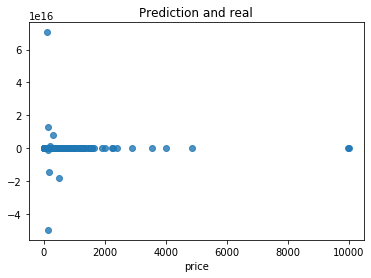

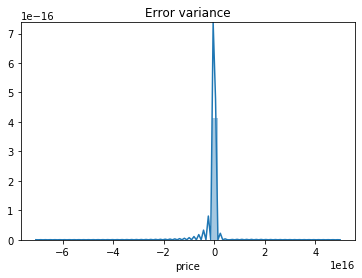

In [33]:
lm = LinearRegression(
        n_jobs = -1,
        normalize = True
)

lm.fit(X_train, y_train)

comment = ''

analysis(
    model = lm, 
    X_train = X_train, 
    X_test = X_test, 
    y_train = y_train, 
    y_test = y_test
)

In [ ]:
rfm = RandomForestRegressor(
          max_depth = 10,
          n_jobs = -1, 
          random_state = 101,
          n_estimators = 700
    
)
rfm.fit(df_d.drop('log_price', axis = 1), df_d['log_price'])

comment = ''

analysis(
    model = rfm, 
    X_train = df_d.drop('log_price', axis = 1), 
    X_test = test.drop('log_price', axis = 1), 
    y_train = df_d['log_price'], 
    y_test = test['log_price']
)

In [ ]:
gbr_model = GradientBoostingRegressor(random_state = 101)
gbr_model.fit(df_d.drop('log_price', axis = 1), df_d['log_price'])

comment = ''

analysis(
    model = gbr_model, 
    X_train = df_d.drop('log_price', axis = 1), 
    X_test = test.drop('log_price', axis = 1), 
    y_train = df_d['log_price'], 
    y_test = test['log_price']
)